Theta0:          3.995,
Theta1:          3.109
Final cost/MSE:  36.396


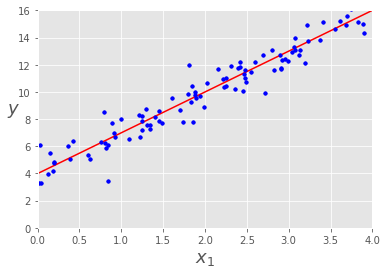

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['ggplot'])

#Radom data for the Y & X values
X = 4 * np.random.rand(100,1)
Y = 4 +3 * X+np.random.randn(100,1)

#Show the data 
plt.plot(X,Y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,4,0,16])

#Linear regresion
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
#Prediction
X_new = np.array([[0],[4]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

#To show the linear function that fit the data
plt.plot(X_new,y_predict,'r-')
plt.plot(X,Y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,4,0,16])

#Cost function
def  cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


#GDE function 
def stocashtic_gradient_descent(X,Y,theta,learning_rate=0.01,iterations=10):

    m = len(Y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = Y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history


#For calculate the cost we have to set the iteration values and beta and learning rate
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,Y,theta,lr,n_iter)

#print the results as well as the MSE to measure the performance of the model
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))